<a href="https://colab.research.google.com/github/shahbashajahan/ict-ml2/blob/main/review_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from bs4 import BeautifulSoup
import string
from collections import Counter
from wordcloud import WordCloud
from scipy.stats import randint

import warnings
warnings.filterwarnings("ignore")

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df = pd.read_csv("/content/IMDB Dataset.csv.zip")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
# Remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Apply function to dataset
df["review"] = df["review"].apply(remove_html_tags)

In [7]:
# Remove pecial characters and numbers
df["review"] = df["review"].str.replace("[^a-zA-Z]", " ", regex=True)

# Remove extra spaces
df["review"] = df["review"].str.replace("\s+", " ", regex=True).str.strip()

In [8]:
# Remove punctuation
punctuation_pattern = f"[{string.punctuation}]"
df["review"] = df["review"].str.replace(punctuation_pattern, "", regex=True)

In [9]:
# Lowercase
df["review"] = df["review"].str.lower()

In [10]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [11]:
# Tokenization
df["review"] = df["review"].apply(word_tokenize)

In [12]:
# Remove stop words
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def remove_stop_words(token_list):
    return [word for word in token_list if word not in stop_words]

df["review"] = df["review"].apply(remove_stop_words)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# Stemming
def stem_tokens(token_list):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in token_list]

df["review"] = df["review"].apply(stem_tokens)

In [14]:
# Extract high-frequency words
all_tokens = [token for sublist in df["review"] for token in sublist]
word_freq = Counter(all_tokens)
most_common_words = word_freq.most_common(20)
most_common_words

[('movi', 103241),
 ('film', 95853),
 ('one', 55435),
 ('like', 45197),
 ('time', 31953),
 ('good', 30179),
 ('make', 30020),
 ('charact', 28347),
 ('see', 28235),
 ('get', 27963),
 ('watch', 27873),
 ('even', 25347),
 ('stori', 25272),
 ('would', 24599),
 ('realli', 23090),
 ('well', 21784),
 ('scene', 21434),
 ('look', 19945),
 ('show', 19913),
 ('much', 19316)]

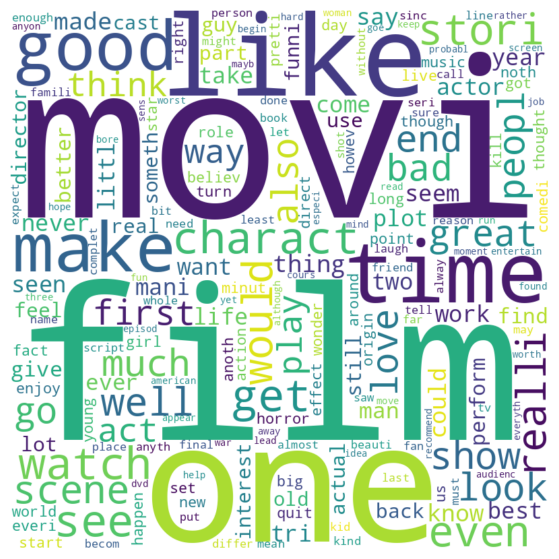

In [15]:
# Visualize it using wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.show()

In [16]:
df["joined_review"] = df["review"].apply(" ".join)
text_data = df["joined_review"]
tfidf_vectorizer = TfidfVectorizer(max_features=2000)

# Fit the vectorizer to the text data and transform it into TF-IDF features
x_tfidf = tfidf_vectorizer.fit_transform(text_data)
x_tfidf

<50000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3571126 stored elements in Compressed Sparse Row format>

In [17]:
# Converting categorical labels to numerical form

df["sentiment_numeric"] = df["sentiment"].map({"positive": 1, "negative": 0})

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, df["sentiment_numeric"], test_size=0.2, random_state=1)

In [19]:
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score



# Load dataset
data = pd.read_csv("/content/IMDB Dataset.csv.zip")

# Preprocessing
stop_words = set(nltk.corpus.stopwords.words('english'))
def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

data['review'] = data['review'].apply(preprocess_text)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

# Feature extraction
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8665


In [21]:
stop_words = set(nltk.corpus.stopwords.words('english'))
def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

# Load trained model and vectorizer
# Assuming nb_classifier and tfidf_vectorizer are already trained and loaded

# Function to predict sentiment
def predict_sentiment(review):
    # Preprocess review
    preprocessed_review = preprocess_text(review)

    # Transform review using TfidfVectorizer
    review_tfidf = tfidf_vectorizer.transform([preprocessed_review])

    # Predict sentiment
    sentiment = nb_classifier.predict(review_tfidf)

    return sentiment[0]

# Example usage
review = input("Enter your movie review: ")
sentiment = predict_sentiment(review)

if sentiment == 'positive':
    print("The review is positive!")
elif sentiment == 'negative':
    print("The review is negative.")
else:
    print("Unable to determine sentiment.")

Enter your movie review: Movie is full of unnecessary slow motion and violence. It was a relief when movie ended.
The review is negative.


In [22]:
# Load dataset
data = pd.read_csv("/content/IMDB Dataset.csv.zip")

# Preprocessing
stop_words = set(nltk.corpus.stopwords.words('english'))
def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

data['review'] = data['review'].apply(preprocess_text)

# Feature extraction
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['review'])
y = data['sentiment']

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X, y)

# Function to classify input review
def classify_review(review):
    preprocessed_review = preprocess_text(review)
    review_tfidf = tfidf_vectorizer.transform([preprocessed_review])
    prediction = nb_classifier.predict(review_tfidf)
    return prediction[0]

# Take input from user
user_review = input("Enter your review: ")

# Classify the review
prediction = classify_review(user_review)

# Print the result
if prediction == 'positive':
    print("The review is positive.")
else:
    print("The review is negative.")

Enter your review: A stupid movie. Just coz the director wanted to show some action he has dragged the most irritating plot unnecessarily. What's wrong with directors these days. Can't they come up with something worth watching. Dark movie with nothing to offer.
The review is negative.


In [23]:
# Take input from user
user_review = input("Enter your review: ")

# Classify the review
prediction = classify_review(user_review)

# Print the result
if prediction == 'positive':
    print("The review is positive.")
else:
    print("The review is negative.")

Enter your review: excellent movie
The review is positive.
